In [34]:
import pandas as pd

# load the metrics

vit_ensemble = pd.read_csv("vit_ensemble_metrics_stack.csv")
conv_ensemble = pd.read_csv("conv_ensemble_metrics_stack.csv")
deit3_base_16 = pd.read_csv("deit3_base_16_metrics_stack.csv")
convnext = pd.read_csv("convnext_metrics_stack.csv")
resnet = pd.read_csv("resnet_metrics_stack.csv")
efficientnet = pd.read_csv("efficientnet_metrics_stack.csv")
vit_base_32 = pd.read_csv("vit_base_32_metrics_stack.csv")
vit_base_16 = pd.read_csv("vit_base_16_metrics_stack.csv")
vit_large_32 = pd.read_csv("vit_large_32_metrics_stack.csv")

In [35]:
vit_ensemble.sort_values(by="test/BalancedAccuracy", ascending=False, inplace=True)
vit_ensemble.describe()

,test/Accuracy,test/BalancedAccuracy
count,32.000000,32.000000
mean,0.807924,0.787888
std,0.001816,0.001955
min,0.805419,0.784703
25%,0.806428,0.786228
50%,0.807870,0.787939
75%,0.809167,0.789233
max,0.811185,0.791813


In [36]:
conv_ensemble.sort_values(by="test/BalancedAccuracy", ascending=False, inplace=True)
conv_ensemble.describe()

,test/Accuracy,test/BalancedAccuracy
count,32.000000,32.000000
mean,0.816671,0.780537
std,0.002495,0.002615
min,0.810897,0.774040
25%,0.814860,0.779081
50%,0.817383,0.780835
75%,0.818175,0.782143
max,0.822427,0.786583


In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Accuracy of Models')

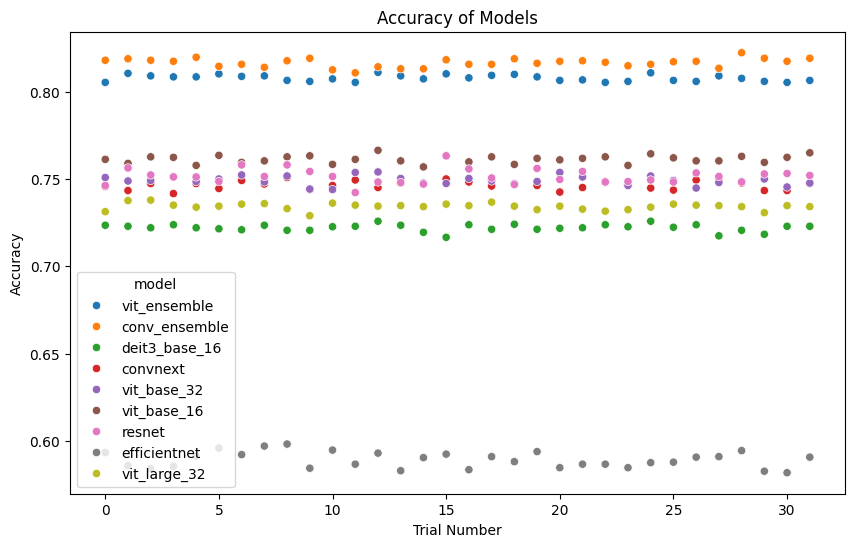

In [38]:
all_metrics = pd.concat(
    [
        vit_ensemble,
        conv_ensemble,
        deit3_base_16,
        convnext,
        vit_base_32,
        vit_base_16,
        resnet,
        efficientnet,
        vit_large_32,
    ],
    axis=0,
)


all_metrics["model"] = (
    ["vit_ensemble"] * vit_ensemble.shape[0]
    + ["conv_ensemble"] * conv_ensemble.shape[0]

    + ["deit3_base_16"] * deit3_base_16.shape[0]
    + ["convnext"] * convnext.shape[0]
    + ["vit_base_32"] * vit_base_32.shape[0]
    + ["vit_base_16"] * vit_base_16.shape[0]
    + ["resnet"] * resnet.shape[0]
    + ["efficientnet"] * efficientnet.shape[0]
    + ["vit_large_32"] * vit_large_32.shape[0]
)

all_metrics


plt.figure(figsize=(10, 6))
sns.scatterplot(data=all_metrics, x=all_metrics.index, y="test/Accuracy", hue="model")
plt.xlabel("Trial Number")
plt.ylabel("Accuracy")
plt.title("Accuracy of Models")

Text(0.5, 1.0, 'Balanced Accuracy of Models')

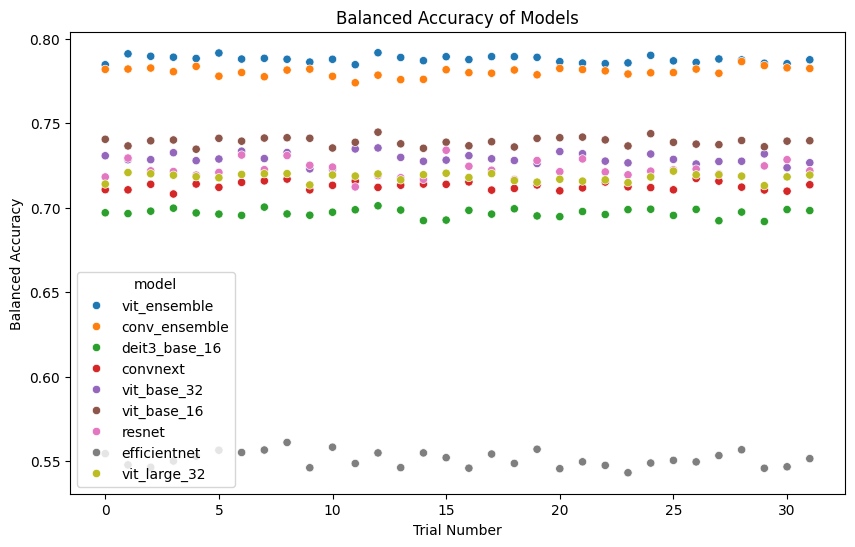

In [39]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=all_metrics, x=all_metrics.index, y="test/BalancedAccuracy", hue="model"
)

plt.xlabel("Trial Number")
plt.ylabel("Balanced Accuracy")
plt.title("Balanced Accuracy of Models")

# Statistical Testing for the Mean of a Normal Distribution of the response variable

Text(0.5, 1.0, 'EfficientNet Balanced Accuracy QQ Plot')

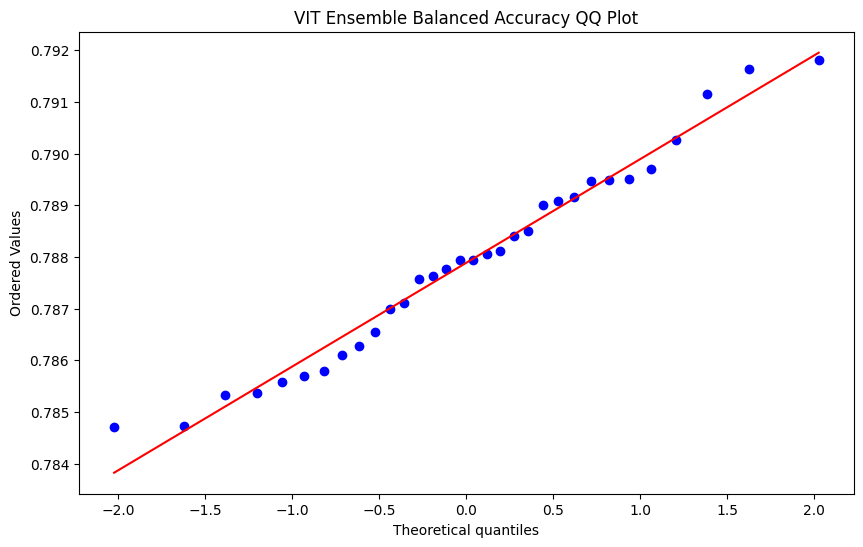

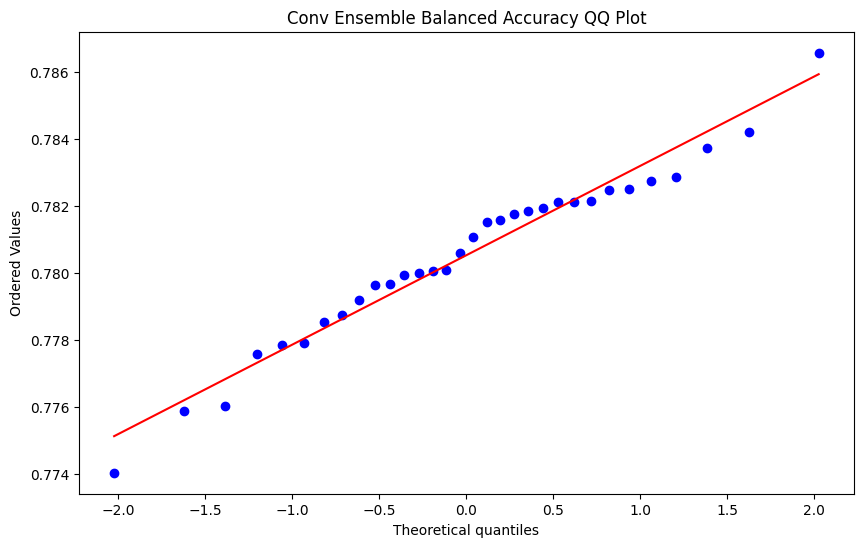

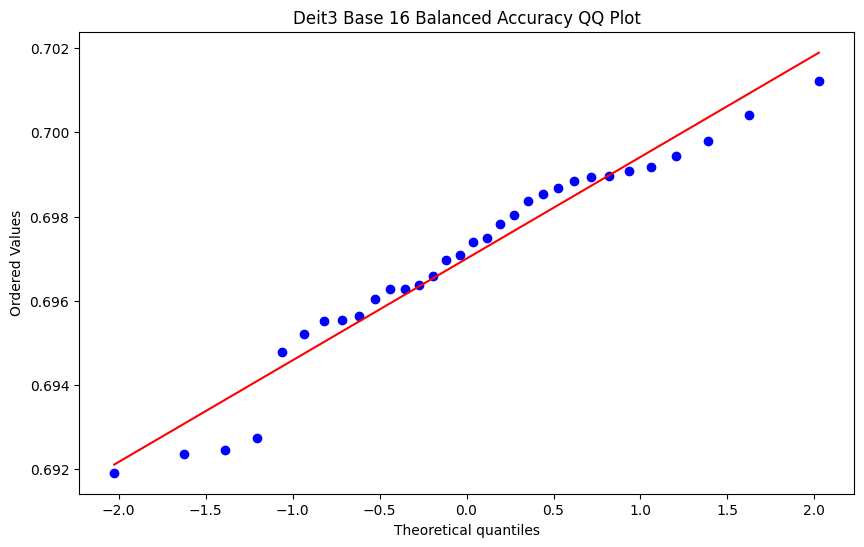

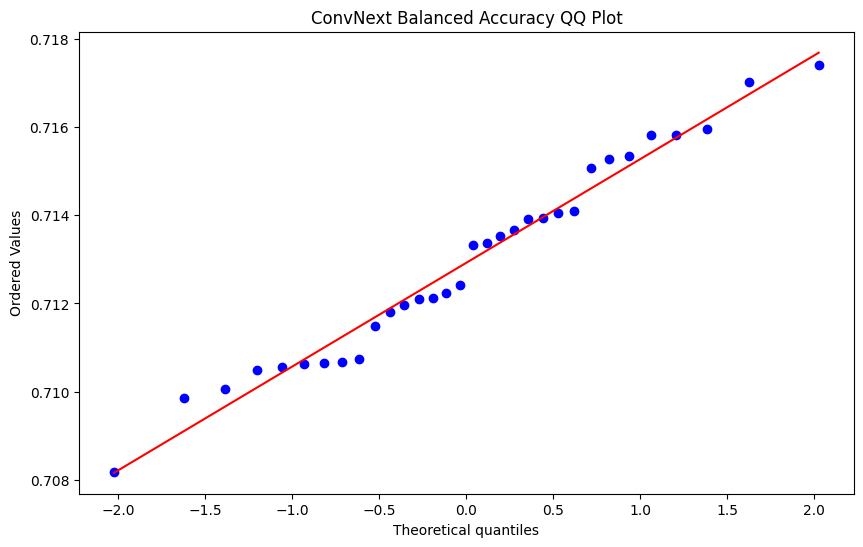

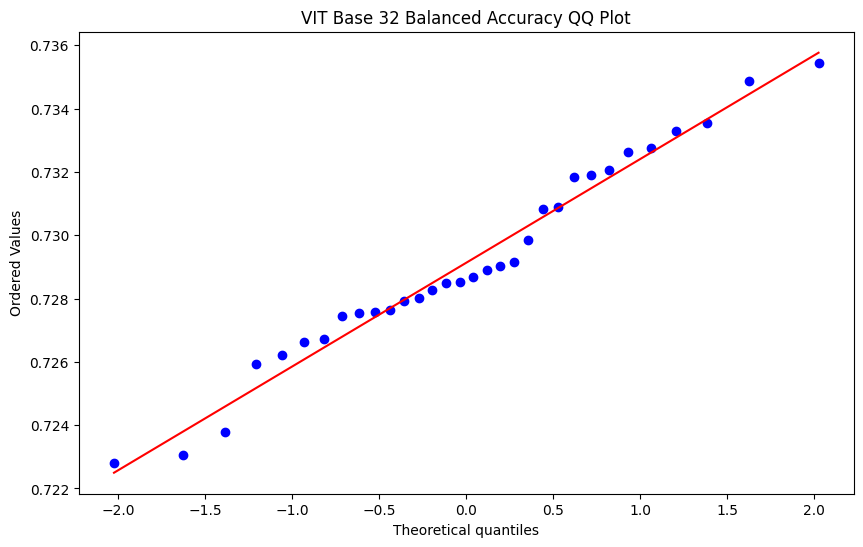

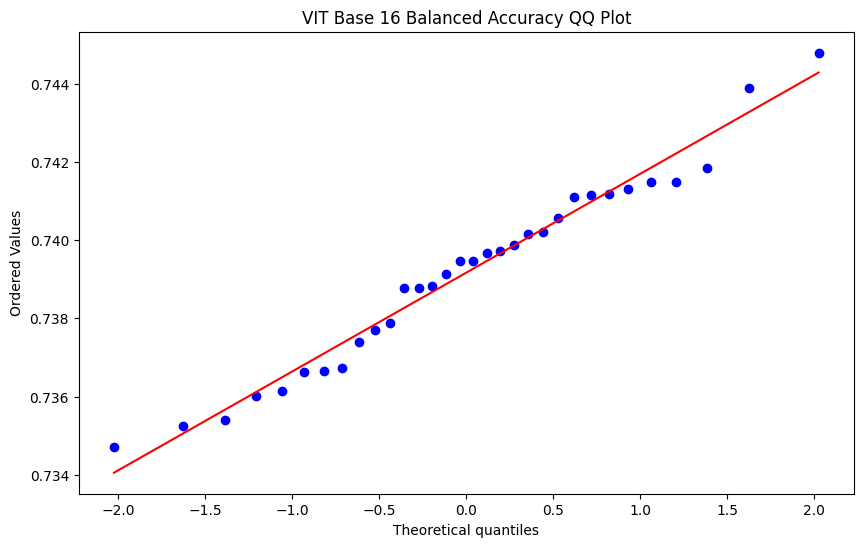

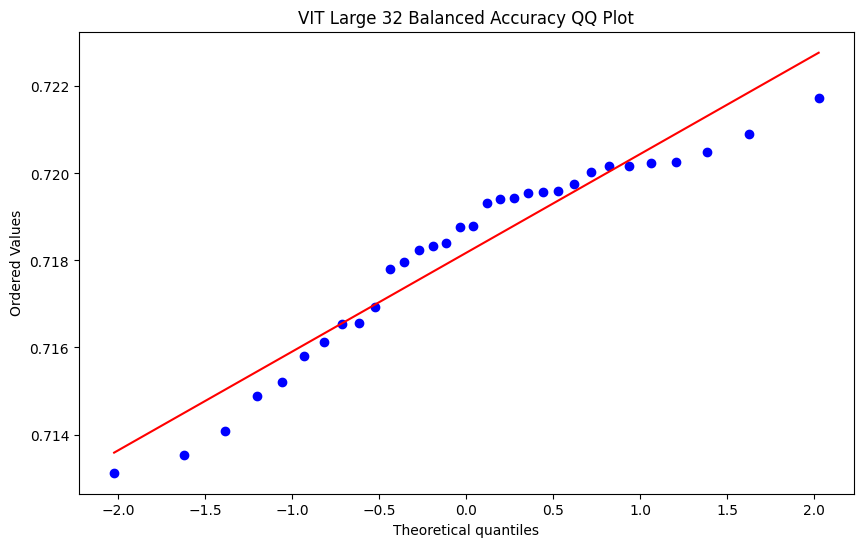

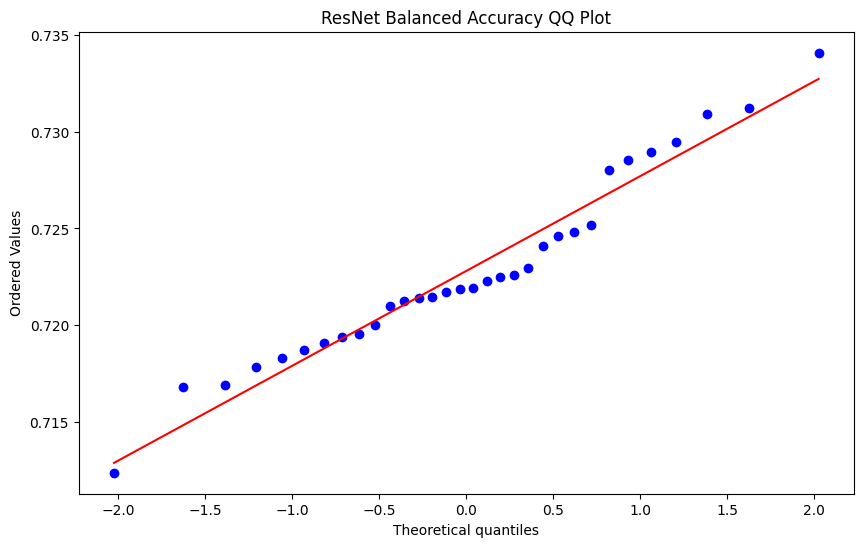

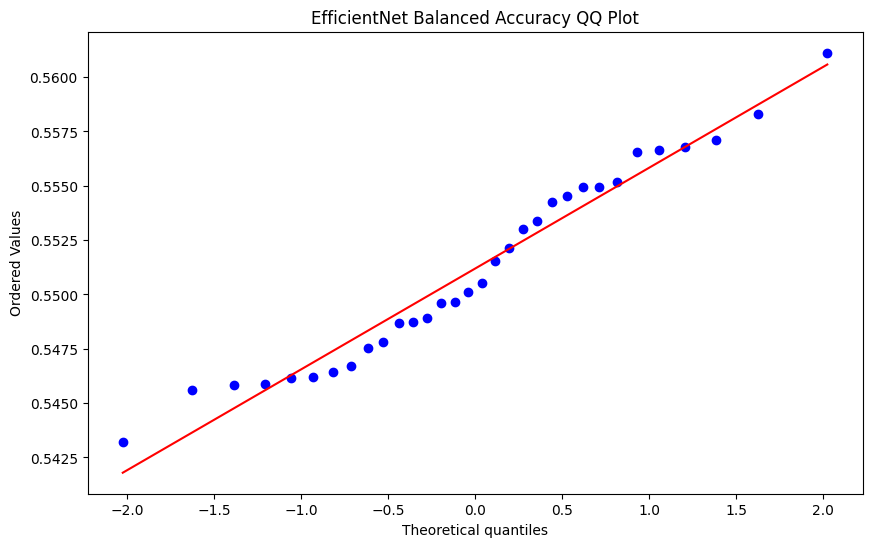

In [40]:
import scipy.stats as stats



# we use the qq plots to check if data is normally distributed


plt.figure(figsize=(10, 6))
stats.probplot(vit_ensemble["test/BalancedAccuracy"], dist="norm", plot=plt)
plt.title("VIT Ensemble Balanced Accuracy QQ Plot")



plt.figure(figsize=(10, 6))
stats.probplot(conv_ensemble["test/BalancedAccuracy"], dist="norm", plot=plt)
plt.title("Conv Ensemble Balanced Accuracy QQ Plot")



plt.figure(figsize=(10, 6))
stats.probplot(deit3_base_16["test/BalancedAccuracy"], dist="norm", plot=plt)
plt.title("Deit3 Base 16 Balanced Accuracy QQ Plot")



plt.figure(figsize=(10, 6))
stats.probplot(convnext["test/BalancedAccuracy"], dist="norm", plot=plt)
plt.title("ConvNext Balanced Accuracy QQ Plot")



plt.figure(figsize=(10, 6))
stats.probplot(vit_base_32["test/BalancedAccuracy"], dist="norm", plot=plt)
plt.title("VIT Base 32 Balanced Accuracy QQ Plot")



plt.figure(figsize=(10, 6))
stats.probplot(vit_base_16["test/BalancedAccuracy"], dist="norm", plot=plt)
plt.title("VIT Base 16 Balanced Accuracy QQ Plot")

plt.figure(figsize=(10, 6))
stats.probplot(vit_large_32["test/BalancedAccuracy"], dist="norm", plot=plt)
plt.title("VIT Large 32 Balanced Accuracy QQ Plot")



plt.figure(figsize=(10, 6))
stats.probplot(resnet["test/BalancedAccuracy"], dist="norm", plot=plt)
plt.title("ResNet Balanced Accuracy QQ Plot")



plt.figure(figsize=(10, 6))
stats.probplot(efficientnet["test/BalancedAccuracy"], dist="norm", plot=plt)
plt.title("EfficientNet Balanced Accuracy QQ Plot")

## Normality Assumption

In [41]:
def check_normality(df: pd.DataFrame, name: str):
    print(f"-Checking normality for {name}-")
    shapiro_stat, shapiro_p = stats.shapiro(df["test/BalancedAccuracy"])
    print(f"Shapiro Statistic: {shapiro_stat}")
    print(f"Shapiro P Value: {shapiro_p}")
    if shapiro_p < 0.05:
        print(f"The data {name} is not normally distributed")
    else:
        print(f"The data {name} is normally distributed")
    print()


check_normality(deit3_base_16, "Deit3 Base 16")
check_normality(convnext, "ConvNext")
check_normality(vit_ensemble, "VIT Ensemble")
check_normality(conv_ensemble, "Conv Ensemble")
check_normality(vit_base_32, "VIT Base 32")
check_normality(vit_base_16, "VIT Base 16")
check_normality(vit_large_32, "VIT Large 32")
check_normality(resnet, "ResNet")
check_normality(efficientnet, "EfficientNet")

-Checking normality for Deit3 Base 16-
Shapiro Statistic: 0.9519665362330546
Shapiro P Value: 0.16386976134578835
The data Deit3 Base 16 is normally distributed

-Checking normality for ConvNext-
Shapiro Statistic: 0.9731330504521092
Shapiro P Value: 0.5899720814497698
The data ConvNext is normally distributed

-Checking normality for VIT Ensemble-
Shapiro Statistic: 0.9689071397528256
Shapiro P Value: 0.4697932027492762
The data VIT Ensemble is normally distributed

-Checking normality for Conv Ensemble-
Shapiro Statistic: 0.975314236988187
Shapiro P Value: 0.6566168728405842
The data Conv Ensemble is normally distributed

-Checking normality for VIT Base 32-
Shapiro Statistic: 0.9722007800017841
Shapiro P Value: 0.5622432126448706
The data VIT Base 32 is normally distributed

-Checking normality for VIT Base 16-
Shapiro Statistic: 0.973891761094334
Shapiro P Value: 0.6129215517764093
The data VIT Base 16 is normally distributed

-Checking normality for VIT Large 32-
Shapiro Statistic

## Shapiro-Wilk Test for Homogeneity of Variance

In [42]:
# Levene test is for equal variances
levene_stat, levene_p = stats.levene(
    vit_ensemble["test/BalancedAccuracy"],
    conv_ensemble["test/BalancedAccuracy"],
    vit_base_16["test/BalancedAccuracy"],
    convnext["test/BalancedAccuracy"],
)
print(levene_stat, levene_p)
if levene_p < 0.05:
    print("The variances are not equal")
    can_make_anova = False
else:
    print("The variances are equal")

0.7421072296634833 0.5289162643469387
The variances are equal


## ANOVA Test for the Mean of a Normal Distribution

In [43]:
# ANOVA test
fvalue, pvalue = stats.f_oneway(
    vit_ensemble["test/BalancedAccuracy"],
    conv_ensemble["test/BalancedAccuracy"],
    convnext["test/BalancedAccuracy"],
    vit_base_16["test/BalancedAccuracy"],
)

print(fvalue, pvalue)
if pvalue < 0.05:
    print("Reject the null hypothesis, the means are not equal")
    print(
        "There is a significant difference between the models in terms of balanced accuracy"
    )
else:
    print("Fail to reject the null hypothesis, the means are equal")
    print(
        "There is no significant difference between the models in terms of balanced accuracy"
    )

7292.09223023743 3.24829482089646e-139
Reject the null hypothesis, the means are not equal
There is a significant difference between the models in terms of balanced accuracy


## Pairwise T-Test for the Mean of a Normal Distribution of the response variable

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
    group1        group2    meandiff p-adj  lower   upper  reject
-----------------------------------------------------------------
conv_ensemble      convnext  -0.0676   0.0   -0.07 -0.0652   True
conv_ensemble deit3_base_16  -0.0835   0.0  -0.086 -0.0811   True
conv_ensemble  efficientnet  -0.2294   0.0 -0.2318 -0.2269   True
conv_ensemble        resnet  -0.0577   0.0 -0.0602 -0.0553   True
conv_ensemble   vit_base_16  -0.0414   0.0 -0.0438 -0.0389   True
conv_ensemble   vit_base_32  -0.0514   0.0 -0.0538  -0.049   True
conv_ensemble  vit_ensemble   0.0074   0.0  0.0049  0.0098   True
conv_ensemble  vit_large_32  -0.0624   0.0 -0.0648 -0.0599   True
     convnext deit3_base_16  -0.0159   0.0 -0.0184 -0.0135   True
     convnext  efficientnet  -0.1617   0.0 -0.1642 -0.1593   True
     convnext        resnet   0.0099   0.0  0.0075  0.0123   True
     convnext   vit_base_16   0.0262   0.0  0.0238  0.0287   True
     convn

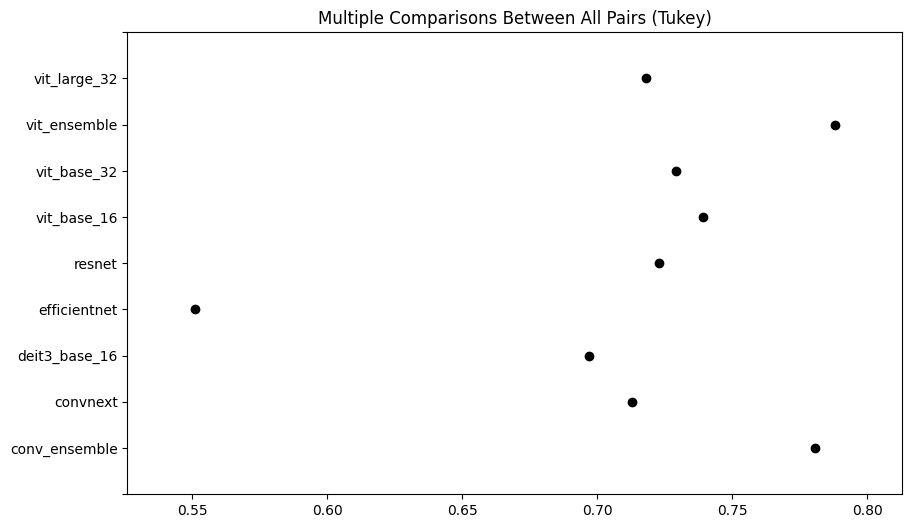

In [44]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# we can use Tukey's HSD test to find out which models are different
# the tukeyhsd test performs multiple pairwise comparisons using the studentized range distribution

m_comp = pairwise_tukeyhsd(all_metrics["test/BalancedAccuracy"], all_metrics["model"])

print(m_comp)

m_comp.plot_simultaneous()

plt.show()